# CPSC 483 Project 2 - NumPy, Polynomial Regression, and Training validation
#### by: Josef Jankowski(josefj1519@csu.fullerton.edu) and William Timani (williamtimani@csu.fullerton.edu)

### 1. Load and examine the Boston dataset’s features, target values, and description.

In [636]:
from sklearn import datasets
dataset_boston = datasets.load_boston()
print(dataset_boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 2. Use sklearn.model_selection.train_test_split() to split the features and values into separate training and test sets. Use 80% of the original data as a training set, and 20% for testing.

In [637]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# Independent variables (i.e. features)
df_boston_features = pd.DataFrame(data=dataset_boston.data, columns=dataset_boston.feature_names)
df_boston_target = pd.DataFrame(data=dataset_boston.target, columns=['MEDV'])

x_train, x_test, y_train, y_test = train_test_split(df_boston_features, df_boston_target, test_size=.2)

### 3. Create a scatterplot of the training set showing the relationship between the feature LSTAT and the target value MEDV. Does the relationship appear to be linear?

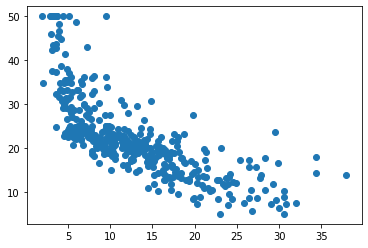

In [638]:
import matplotlib.pyplot as plt

plt.scatter(x_train['LSTAT'], y_train)

The data is mostly linear.  With some outliers when LSTAT below 10.

### 4. With LSTAT as X and MEDV as t, use np.linalg.inv() to compute w for the training set. What is the equation for MEDV as a linear function of LSTAT?

In [639]:
x_reshape_train = np.array(x_train['LSTAT']).reshape([-1,1])
X = np.hstack((np.ones_like(x_reshape_train),x_reshape_train))
t = np.array(y_train['MEDV']).reshape([-1,1])
XX = np.dot(X.T,X)
invXX = np.linalg.inv(XX)
Xt = np.dot(X.T, t)
w = np.dot(invXX, Xt)
print('y= ' + str(w[0][0]) + str(w[1][0]) + 'x')

y= 34.713011948197334-0.9736087127975894x


### 5. Use w to add a line to your scatter plot from experiment (3). How well does the model appear to fit the training set?

Text(0, 0.5, 'MEDV')

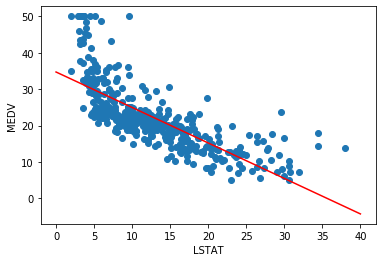

In [640]:
plt.scatter(x_train['LSTAT'], y_train)
x = np.linspace(0, 40, 100)
plt.plot(x, x*w[1][0]+ w[0][0], color='red')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

### 6. Use w to find the response for each value of the LSTAT attribute in the test set, then compute the test MSE 𝓛 for the model.

In [641]:
from sklearn.metrics import mean_squared_error

test = np.array([])
for x in x_test['LSTAT']:
    test = np.append(test, x*w[1][0]+w[0][0])
    
mse = mean_squared_error(test, y_test, squared=True)
print(mse)

46.6579766713339


### 7. Now add an x2 column to LSTAT’s x column in the training set, then repeat experiments (4), (5), and (6) for MEDV as a quadratic function of LSTAT. Does the quadratic polynomial do a better job of predicting the values in the test set?

In [642]:
xsquared = np.square(x_train['LSTAT'])
xsquared = np.array(xsquared).reshape([-1,1])
X = np.hstack((np.ones_like(x_reshape_train),x_reshape_train, xsquared))
t = np.array(y_train['MEDV']).reshape([-1,1])
XX = np.dot(X.T,X)
invXX = np.linalg.inv(XX)
Xt = np.dot(X.T, t)
w = np.dot(invXX, Xt)
print('y= ' + str(w[0][0]) + str(w[1][0]) + 'x + ' + str(w[2][0]) + 'x^2')

y= 43.49595164605219-2.4307627558149747x + 0.04640547075599599x^2


Text(0, 0.5, 'MEDV')

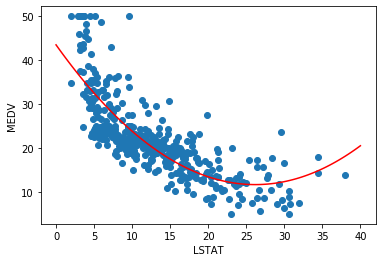

In [643]:
plt.scatter(x_train['LSTAT'], y_train)
x = np.linspace(0, 40, 100)
plt.plot(x, (x**2)*w[2][0]+x*w[1][0]+ w[0][0], color='red')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

In [644]:
test = np.array([])
for x in x_test['LSTAT']:
    test = np.append(test,(x**2)*w[2][0]+x*w[1][0]+w[0][0])
    
mse = mean_squared_error(test, y_test, squared=True)
print(mse)

39.095367971533605


It appears that the quadratic model does a better job of predicting the values. As it has a smaller MSE.  

### 8. Repeat experiment (4) with all 13 input features as X and using np.linalg.solve(). (See the Appendix to Linear regression in vector and matrix format for details.) Does adding additional features improve the performance on the test set compared to using only LSTAT?

In [645]:
t = np.array(y_train['MEDV']).reshape([-1,1])
x_reshape_test = np.array(np.ones_like(np.array(x_train['LSTAT']).reshape([-1,1])))
for attr in x_train:
    x_reshape_test = np.hstack((x_reshape_test, np.array(x_train[attr]).reshape([-1,1])))
X = x_reshape_test
XX = np.dot(X.T,X)
Xt = np.dot(X.T,t)
w = np.linalg.solve(XX,Xt)

equation= 'y= '
for i in range(w.size):
    if  i != 0:
        equation += '+ (' + str(w[i][0]) + 'x_' + str(i) + ') '
    else:
        equation += '(' + str(w[i][0]) + ') '
print(equation)
print('\n')
test = np.zeros(np.size(x_test, 0))
xtest = np.array(x_test)
for i in range(np.size(xtest, 0)):
    test[i] = w[0][0]
    for j in range(np.size(xtest, 1)):
       test[i] += w[j+1][0]*xtest[i][j]

mse = mean_squared_error(test, y_test['MEDV'], squared=True)
print(mse)

y= (32.879834058706784) + (-0.1194459653365661x_1) + (0.0489292119874315x_2) + (0.0172466140721152x_3) + (2.392930628247413x_4) + (-15.453372905064844x_5) + (4.000920287503031x_6) + (-0.007660159547488361x_7) + (-1.5828430230218424x_8) + (0.28528182382277495x_9) + (-0.013290602882135611x_10) + (-0.8248202791846776x_11) + (0.010103744319146686x_12) + (-0.5265226768050139x_13) 


29.019401795926974


##### Adding additional features does seem to improve the performance on the test set compared to only using LSTAT

### 9. Now add x2 columns for all 13 features, and repeat experiment (8). Does adding quadratic features improve the performance on the test set compared to using only linear features?

In [646]:
t = np.array(y_train['MEDV']).reshape([-1,1])
for attr in x_train:
    xsquared = np.square(x_train[attr])
    xsquared = np.array(xsquared).reshape([-1,1])
    x_reshape_test = np.hstack((x_reshape_test, xsquared))

X = x_reshape_test
XX = np.dot(X.T,X)
Xt = np.dot(X.T,t)
w = np.linalg.solve(XX,Xt)

test = np.zeros(np.size(x_test, 0))
xtest = np.array(x_test)
for i in range(np.size(xtest, 0)):
    test[i] = w[0][0]
    for j in range(np.size(xtest, 1)):
       test[i] += (w[j+1][0]*xtest[i][j]) + (w[j+14][0]*(xtest[i][j]**2))

mse = mean_squared_error(test, y_test['MEDV'], squared=True)
print(mse)

24.85299393313295


##### Adding quadratic features does seem to improve the performance on the test set compared to only using LSTAT and additional Xs.  

### 10. Compute the training MSE for experiments (8) and (9) and compare it to the test MSE. What explains the difference?

In [647]:
# Extra features
t = np.array(y_train['MEDV']).reshape([-1,1])
x_reshape_train = np.array(np.ones_like(np.array(x_train['LSTAT']).reshape([-1,1])))
for attr in x_train:
    x_reshape_train = np.hstack((x_reshape_train, np.array(x_train[attr]).reshape([-1,1])))
X = x_reshape_train
XX = np.dot(X.T,X)
Xt = np.dot(X.T,t)
w = np.linalg.solve(XX,Xt)

train = np.zeros(np.size(x_train, 0))
xtrain = np.array(x_train)
for i in range(np.size(xtrain, 0)):
    train[i] = w[0][0]
    for j in range(np.size(xtrain, 1)):
       train[i] += w[j+1][0]*xtrain[i][j]

mse = mean_squared_error(train, y_train['MEDV'], squared=True)
print('Extra variables Train MSE: ', mse)

Extra variables Train MSE:  20.279197748796715


In [648]:
# Quadratic
t = np.array(y_train['MEDV']).reshape([-1,1])
for attr in x_train:
    xsquared = np.square(x_train[attr])
    xsquared = np.array(xsquared).reshape([-1,1])
    x_reshape_train = np.hstack((x_reshape_train, xsquared))

X = x_reshape_train
XX = np.dot(X.T,X)
Xt = np.dot(X.T,t)
w = np.linalg.solve(XX,Xt)


train = np.zeros(np.size(x_train, 0))
xtrain = np.array(x_train)
for i in range(np.size(xtrain, 0)):
    train[i] = w[0][0]
    for j in range(np.size(xtest, 1)):
       train[i] += (w[j+1][0]*xtrain[i][j]) + (w[j+14][0]*(xtrain[i][j]**2))

mse = mean_squared_error(train, y_train['MEDV'], squared=True)
print('Quadratic Train MSE: ', mse)

Quadratic Train MSE:  11.969943228169951


##### Training MSE is overall lower because the equation currently overfits the data.  

### 11. Repeat experiments (9) and (10), adding x3 columns in addition to the existing x and x2 columns for each feature. Does the cubic polynomial do a better job of predicting the values in the training set? Does it do a better job of predicting the values in the test set?

In [649]:
t = np.array(y_train['MEDV']).reshape([-1,1])
for attr in x_train:
    xcubed = np.power(x_train[attr], 3)
    xcubed = np.array(xcubed).reshape([-1,1])
    x_reshape_test = np.hstack((x_reshape_test, xcubed))
    
X = x_reshape_test
XX = np.dot(X.T,X)
Xt = np.dot(X.T,t)
w = np.linalg.solve(XX,Xt)

test = np.zeros(np.size(x_test, 0))
xtest = np.array(x_test)
for i in range(np.size(xtest, 0)):
    test[i] = w[0][0]
    for j in range(np.size(xtest, 1)):
        test[i] += w[j+1][0]*(xtest[i][j])
        test[i] += w[j+14][0]*(xtest[i][j]**2) 
        test[i] += w[j+27][0]*(xtest[i][j]**3)
        
mse = mean_squared_error(test, y_test['MEDV'], squared=True)
print('Cubed Test MSE: ', mse)

# Train MSE
for attr in x_train:
    xcubed = np.power(x_train[attr], 3)
    xcubed = np.array(xcubed).reshape([-1,1])
    x_reshape_train = np.hstack((x_reshape_train, xcubed))

X = x_reshape_train
XX = np.dot(X.T,X)
Xt = np.dot(X.T,t)
w = np.linalg.solve(XX,Xt)


train = np.zeros(np.size(x_train, 0))
xtrain = np.array(x_train)
for i in range(np.size(xtrain, 0)):
    train[i] = w[0][0]
    for j in range(np.size(xtest, 1)):
        train[i] += w[j+1][0]*(xtrain[i][j])
        train[i] += w[j+14][0]*(xtrain[i][j]**2) 
        train[i] += w[j+27][0]*(xtrain[i][j]**3)

mse = mean_squared_error(train, y_train['MEDV'], squared=True)
print('Cubed Train MSE: ', mse)

Cubed Test MSE:  1459279.1210026199
Cubed Train MSE:  2315451.2296099323
